# TikTok Reviews Sentiment Analysis using Python

In [1]:
# TikTok Reviews Sentiment Analysis using Python

In [2]:
#libraries

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Selman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#read data

In [5]:
df=pd.read_csv("tiktok_google_play_reviews.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
#see first 5 cels

In [7]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,No words,5,0,27.1.3,2022-11-29 21:55:37,NaN,NaN
1,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,Great fun app so far!,5,0,NaN,2022-11-29 21:55:04,NaN,NaN
2,96618aa1-31e5-4259-8649-89b75d962f00,Rylee Maher,https://play-lh.googleusercontent.com/a/ALm5wu...,The app would get a higher rating but I litera...,1,0,27.1.3,2022-11-29 21:54:48,NaN,NaN
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0,NaN,2022-11-29 21:54:35,NaN,NaN
4,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,Pictures and record,5,0,NaN,2022-11-29 21:54:21,NaN,NaN


In [16]:
#see df shape

In [17]:
df.shape

(460287, 10)

In [18]:
#take targets

In [20]:
df=df[["content","score"]]

In [23]:
#check null values

In [24]:
df.isnull().sum()

content    16
score       0
dtype: int64

In [25]:
#drop null values

In [27]:
df=df.dropna()

In [22]:
#preprocesing

In [28]:
# convert to lowercase, remove non-alphanumeric characters, digits, newline, and carriage return

In [29]:
df['content'] = df['content'].str.lower().replace('[^\w\s]', '', regex=True).replace('\d+', '', regex=True).replace('\n', '', regex=True).replace('\r', '', regex=True) 

C:\Users\Selman\AppData\Local\Temp\ipykernel_54764\989965204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].str.lower().replace('[^\w\s]', '', regex=True).replace('\d+', '', regex=True).replace('\n', '', regex=True).replace('\r', '', regex=True)


In [32]:
#data visualization

In [44]:
#score countplot

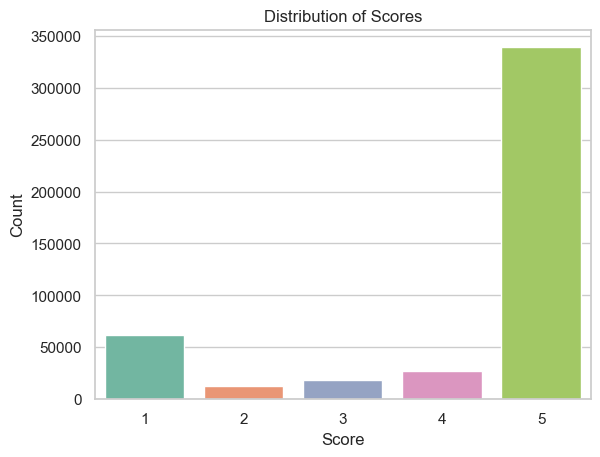

In [43]:
sns.countplot(data=df, x="score", palette="Set2")
plt.title("Distribution of Scores")
plt.xlabel("score")
plt.ylabel("count");

### Analysis

In [46]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Selman\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [47]:
# we use ready module from nltk

In [49]:
# define a object
sentiments = SentimentIntensityAnalyzer()

In [50]:
# apply all data sentiment alanyzer and define t ocolumns

In [51]:
df["Positive"] = df["content"].apply(lambda x: sentiments.polarity_scores(x)["pos"])
df["Negative"] = df["content"].apply(lambda x: sentiments.polarity_scores(x)["neg"])
df["Neutral"] = df["content"].apply(lambda x: sentiments.polarity_scores(x)["neu"])

In [52]:
#see results

In [53]:
df.head()

,content,score,Positive,Negative,Neutral
0,no words,5,0.000,0.688,0.312
1,great fun app so far,5,0.712,0.000,0.288
2,the app would get a higher rating but i litera...,1,0.000,0.073,0.927
3,i wish i could give this a percent rating i l...,5,0.535,0.000,0.465
4,pictures and record,5,0.000,0.000,1.000


In [55]:
#make woedcloud

In [56]:
#for positive

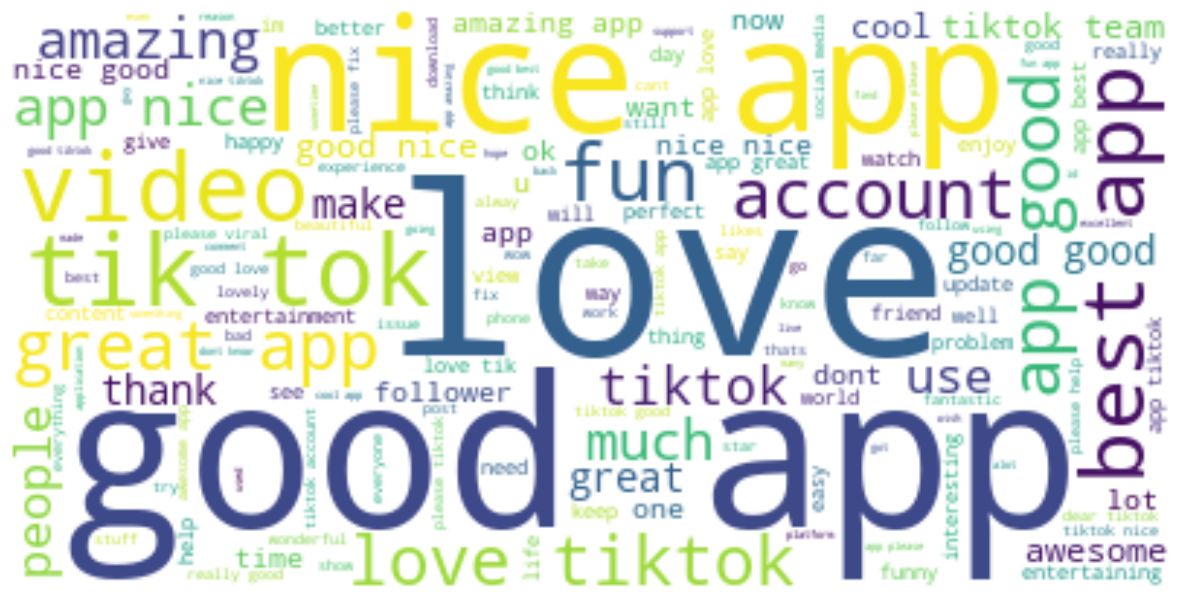

In [58]:
positive =' '.join([i for i in df['content'][df['Positive'] > df["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [59]:
#for negative

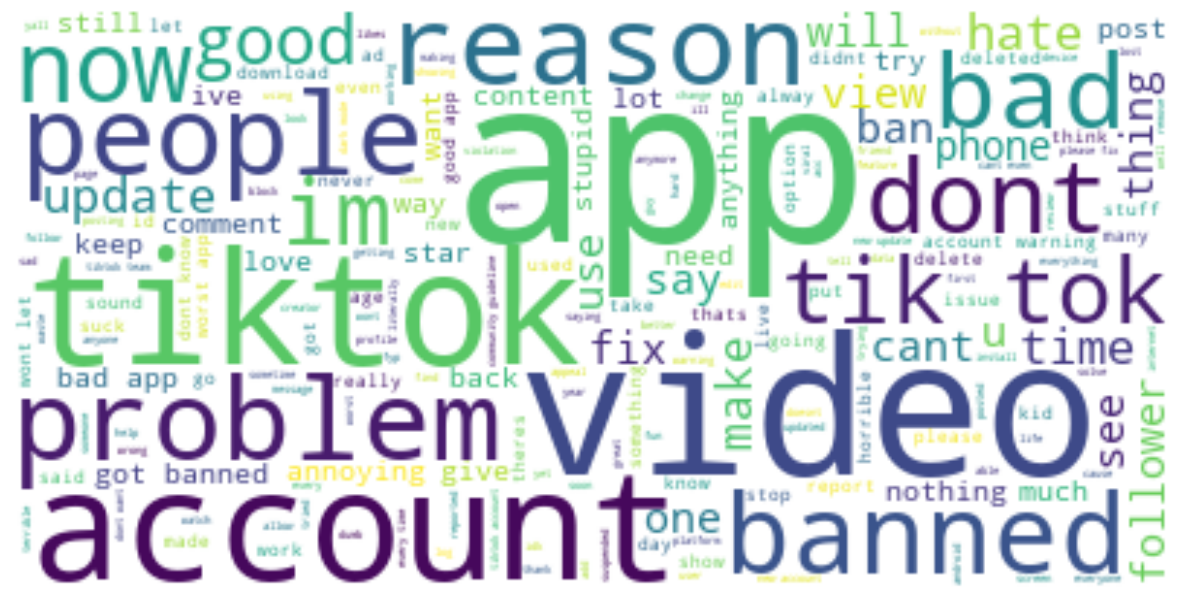

In [60]:
negative =' '.join([i for i in df['content'][df['Negative'] > df["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [61]:
#sources

-Zafer Acar Notes , -[https://thecleverprogrammer.com/2022/04/12/tiktok-reviews-sentiment-analysis-using-python/],-[https://chat.openai.com/]s